<h1>- Import library<h1>

In [1]:
!pip install geopy

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: done

# All requested packages already installed.



In [3]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 


%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') 


print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


from sklearn.cluster import KMeans

import folium 

print('Libraries imported.')

Matplotlib version:  3.0.2
Libraries imported.


<h1>1. Download data</h1>

In [4]:
paris_data = pd.read_csv("https://lvdesign.com.fr/coursera_data/paris.csv")
paris_data

,Lieux,Latitude,Longitude
0,Musée du Louvre,48.860611,2.335450
1,Notre Dame de Paris,48.852968,2.347708
2,Arc de Triomphe,48.873792,2.295028
3,Tour Eiffel,48.858370,2.294481


<h1>2. Location Placement on the map of Paris</h1>

In [5]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [60]:
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=13)


for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Lieux']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

<h3>Define Foursquare Credentials and Version</h3>

In [7]:
CLIENT_ID = 'QXZ045UL3H2GGQJM2XAUZJKWEKMVK4ZRAJY1HZRRJHWR5LQY' 
CLIENT_SECRET = '51N5AKZACCK4UHMQE1FC4VNPM3QYE42UB1NARJ1XKFH3WGMG' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QXZ045UL3H2GGQJM2XAUZJKWEKMVK4ZRAJY1HZRRJHWR5LQY
CLIENT_SECRET:51N5AKZACCK4UHMQE1FC4VNPM3QYE42UB1NARJ1XKFH3WGMG


<h3>Explore the city</h3>

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
      
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
      
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'
                             
                   ]
    
    return(nearby_venues)

<h1>3. Rating of Venue</h1>

In [9]:
venue_id ={
    'Musée du Louvre': '4adcda10f964a520af3521e3',
    'Cathédrale Notre-Dame de Paris': '4adcda09f964a520e83321e3',
    'Tour Eiffel': '51a2445e5019c80b56934c75',
    'Arc de Triomphe': '4adcda09f964a520de3321e3'
}

for key,value in venue_id.items():
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(value, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print('Venue :', key)
        print('Rating : ', result['response']['venue']['rating'])
        print('Total Tips : ', result['response']['venue']['tips']['count'])
        print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
        print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
        
        print()

    except:
        print('This venue has not been rated yet.')

Venue : Musée du Louvre
Rating :  9.4
Total Tips :  2269
Nb Likes :  167
Nb Likes / Total Tips 7.360070515645659

Venue : Cathédrale Notre-Dame de Paris
Rating :  9.4
Total Tips :  977
Nb Likes :  57
Nb Likes / Total Tips 5.834186284544525

Venue : Tour Eiffel
Rating :  9.4
Total Tips :  2645
Nb Likes :  933
Nb Likes / Total Tips 35.274102079395085

Venue : Arc de Triomphe
Rating :  9.5
Total Tips :  777
Nb Likes :  102
Nb Likes / Total Tips 13.127413127413126



<h1>4. Category of Venue</h1>

In [10]:
paris_data_venues = getNearbyVenues(names=paris_data['Lieux'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )
paris_data_venues

Musée du Louvre
Notre Dame de Paris
Arc de Triomphe
Tour Eiffel


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Musée du Louvre,48.860611,2.335450,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,Art Museum
1,Musée du Louvre,48.860611,2.335450,La Vénus de Milo (Vénus de Milo),5864efb745c3ed1e7d88e96d,48.859943,2.337234,Exhibit
2,Musée du Louvre,48.860611,2.335450,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,Historic Site
3,Musée du Louvre,48.860611,2.335450,Cour Napoléon,5072efe7e4b0c34b5146e7fd,48.861172,2.335088,Plaza
4,Musée du Louvre,48.860611,2.335450,Cour Carrée du Louvre,4c079d740ed3c928b6be797d,48.860360,2.338543,Pedestrian Plaza
5,Musée du Louvre,48.860611,2.335450,모나리자 / 라 조콘다 (Mona Lisa | La Joconde),56f279c4cd10850a585f5e31,48.860139,2.335337,Exhibit
6,Musée du Louvre,48.860611,2.335450,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,Plaza
7,Musée du Louvre,48.860611,2.335450,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",588ba9a9fc5a5f18a36a2a05,48.860724,2.332121,Art Museum
8,Musée du Louvre,48.860611,2.335450,Carrousel du Louvre,4adcda1df964a5202e3921e3,48.861642,2.334217,Shopping Mall
9,Musée du Louvre,48.860611,2.335450,Pylones,4cfe0d10ee9cb60cd0979dad,48.861419,2.334143,Gift Shop


<h3>count</h3>

In [11]:
paris_data_venues.groupby('Lieux').count()

,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Lieux,,,,,,,
Arc de Triomphe,100,100,100,100,100,100,100
Musée du Louvre,90,90,90,90,90,90,90
Notre Dame de Paris,100,100,100,100,100,100,100
Tour Eiffel,50,50,50,50,50,50,50


<h1>5. Histogramme</h1>

In [12]:
df_view_new = paris_data_venues.groupby('Lieux').count()
df_paris_histo = df_view_new['Venue Category']
df_paris_histo

Lieux
Arc de Triomphe        100
Musée du Louvre         90
Notre Dame de Paris    100
Tour Eiffel             50
Name: Venue Category, dtype: int64

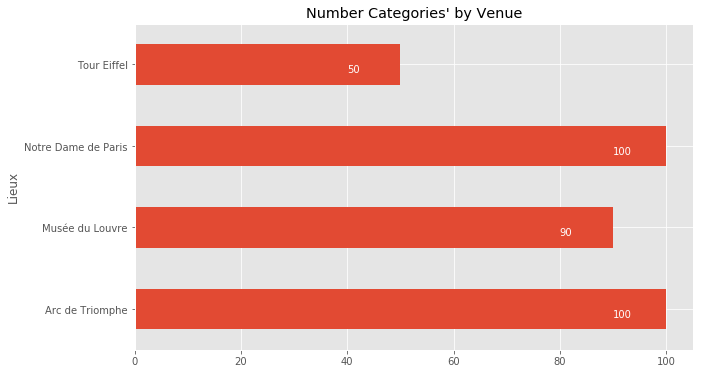

In [13]:
df_paris_histo.plot(kind='barh', figsize=(10,6))


plt.title('Number Categories\' by Venue')

for index, value in enumerate(df_paris_histo): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

<h1>6. Analyse for each Categories</h1>

In [14]:
paris_onehot = pd.get_dummies(paris_data_venues[['Venue Category']], prefix="", prefix_sep="")

paris_onehot['Lieux'] = paris_data_venues['Lieux'] 

fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Basque Restaurant,Beach Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bridge,Burger Joint,Bus Stop,Café,Candy Store,Cantonese Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Gym,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Optical Shop,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Shop
0,Musée du Louvre,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Musée du Louvre,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
paris_grouped = paris_onehot.groupby('Lieux').mean().reset_index()
paris_grouped

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Basque Restaurant,Beach Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bridge,Burger Joint,Bus Stop,Café,Candy Store,Cantonese Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Gym,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Optical Shop,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Shop
0,Arc de Triomphe,0.000000,0.000000,0.02,0.02,0.030000,0.010000,0.00,0.00,0.020000,0.000000,0.010000,0.00,0.000000,0.01,0.000000,0.00,0.000000,0.010000,0.01,0.01,0.00,0.00,0.00,0.00,0.000000,0.020000,0.010000,0.010000,0.01,0.00,0.00,0.010000,0.01,0.01,0.000000,0.00,0.01,0.000000,0.00,0.01,0.00,0.00,0.170000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.210000,0.01,0.00,0.01,0.070000,0.020000,0.00,0.01,0.00,0.01,0.000000,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.02,0.000000,0.02,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.010000,0.00,0.000000,0.00,0.00,0.01,0.030000,0.01,0.00,0.000000,0.00,0.000000,0.000000,0.02,0.01,0.00,0.02,0.00,0.01,0.00,0.000000,0.01,0.000000,0.00,0.01,0.00,0.00,0.000000,0.01,0.00
1,Musée du Louvre,0.033333,0.011111,0.00,0.00,0.022222,0.022222,0.00,0.00,0.011111,0.011111,0.011111,0.00,0.011111,0.00,0.011111,0.00,0.011111,0.055556,0.00,0.00,0.00,0.00,0.00,0.00,0.011111,0.022222,0.011111,0.055556,0.00,0.00,0.00,0.022222,0.00,0.00,0.022222,0.00,0.00,0.022222,0.00,0.00,0.00,0.00,0.155556,0.011111,0.011111,0.011111,0.011111,0.00,0.044444,0.00,0.077778,0.00,0.00,0.00,0.033333,0.033333,0.00,0.00,0.00,0.00,0.011111,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.022222,0.00,0.00,0.011111,0.00,0.011111,0.011111,0.011111,0.00,0.055556,0.00,0.011111,0.00,0.00,0.00,0.022222,0.00,0.00,0.011111,0.00,0.011111,0.011111,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.011111,0.00,0.011111,0.00,0.00,0.00,0.00,0.011111,0.00,0.00
2,Notre Dame de Paris,0.000000,0.010000,0.01,0.00,0.040000,0.040000,0.01,0.00,0.040000,0.040000,0.000000,0.00,0.000000,0.00,0.000000,0.02,0.000000,0.040000,0.01,0.00,0.00,0.01,0.00,0.01,0.020000,0.000000,0.010000,0.030000,0.00,0.01,0.00,0.010000,0.02,0.00,0.010000,0.01,0.00,0.000000,0.01,0.00,0.01,0.01,0.110000,0.000000,0.020000,0.000000,0.000000,0.01,0.020000,0.01,0.050000,0.00,0.02,0.01,0.000000,0.030000,0.01,0.00,0.01,0.00,0.000000,0.02,0.00,0.01,0.01,0.03,0.01,0.00,0.00,0.01,0.00,0.000000,0.00,0.00,0.010000,0.02,0.010000,0.000000,0.000000,0.00,0.040000,0.02,0.000000,0.00,0.00,0.00,0.000000,0.00,0.01,0.000000,0.02,0.000000,0.000000,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.000000,0.00,0.010000,0.00,0.00,0.00,0.00,0.000000,0.00,0.01
3,Tour Eiffel,0.020000,0.000000,0.00,0.00,0.060000,0.020000,0.00,0.02,0.000000,0.000000,0.000000,0.04,0.000000,0.00,0.000000,0.00,0.000000,0.040000,0.00,0.00,0.02,0.00,0.02,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.02,0.000000,0.00,0.02,0.000000,0.00,0.00,0.000000,0.00

<h3>Top ten common venues</h3>

In [16]:
num_top_venues = 10

for hood in paris_grouped['Lieux']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arc de Triomphe----
                 venue  freq
0                Hotel  0.21
1    French Restaurant  0.17
2   Italian Restaurant  0.07
3               Bakery  0.03
4       Sandwich Place  0.03
5  Japanese Restaurant  0.02
6           Steakhouse  0.02
7            Nightclub  0.02
8          Men's Store  0.02
9       Clothing Store  0.02


----Musée du Louvre----
                 venue  freq
0    French Restaurant  0.16
1                Hotel  0.08
2                 Café  0.06
3                Plaza  0.06
4          Coffee Shop  0.06
5        Historic Site  0.04
6           Art Museum  0.03
7   Italian Restaurant  0.03
8  Japanese Restaurant  0.03
9              Exhibit  0.02


----Notre Dame de Paris----
                venue  freq
0   French Restaurant  0.11
1               Hotel  0.05
2               Plaza  0.04
3              Bakery  0.04
4                 Bar  0.04
5                Café  0.04
6              Bistro  0.04
7           Bookstore  0.04
8         Coffee Shop  0.03
9 

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = paris_grouped['Lieux']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted


,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arc de Triomphe,Hotel,French Restaurant,Italian Restaurant,Bakery,Sandwich Place,Bagel Shop,Men's Store,Japanese Restaurant,Asian Restaurant,Bistro
1,Musée du Louvre,French Restaurant,Hotel,Plaza,Café,Coffee Shop,Historic Site,Italian Restaurant,Japanese Restaurant,Art Museum,Museum
2,Notre Dame de Paris,French Restaurant,Hotel,Plaza,Bistro,Café,Bookstore,Bakery,Bar,Coffee Shop,Japanese Restaurant
3,Tour Eiffel,French Restaurant,Italian Restaurant,Bakery,Hotel,Café,Plaza,Garden,Brasserie,Champagne Bar,Chinese Restaurant


<h1>7. Search by Interest's Venues with Clusters method</h1>

In [19]:
kclusters = 4

paris_grouped_clustering = paris_grouped.drop('Lieux', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

kmeans.labels_[0:10]

array([0, 3, 1, 2], dtype=int32)

In [20]:
paris_merged = paris_data

paris_merged['Cluster Labels'] = kmeans.labels_

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Lieux')
paris_merged 

,Lieux,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Musée du Louvre,48.860611,2.335450,0,French Restaurant,Hotel,Plaza,Café,Coffee Shop,Historic Site,Italian Restaurant,Japanese Restaurant,Art Museum,Museum
1,Notre Dame de Paris,48.852968,2.347708,3,French Restaurant,Hotel,Plaza,Bistro,Café,Bookstore,Bakery,Bar,Coffee Shop,Japanese Restaurant
2,Arc de Triomphe,48.873792,2.295028,1,Hotel,French Restaurant,Italian Restaurant,Bakery,Sandwich Place,Bagel Shop,Men's Store,Japanese Restaurant,Asian Restaurant,Bistro
3,Tour Eiffel,48.858370,2.294481,2,French Restaurant,Italian Restaurant,Bakery,Hotel,Café,Plaza,Garden,Brasserie,Champagne Bar,Chinese Restaurant


<h3>visualisation</h3>

In [21]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

x = np.arange(kclusters)
ys = [i+x+(i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Lieux'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h1>Cluster 0 : Musee du louvre</h1>

In [22]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48.860611,Hotel,Plaza,Café,Coffee Shop,Historic Site,Italian Restaurant,Japanese Restaurant,Art Museum,Museum


<h1>Cluster 1 : Arc de Triomphe</h1>

In [24]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,48.873792,French Restaurant,Italian Restaurant,Bakery,Sandwich Place,Bagel Shop,Men's Store,Japanese Restaurant,Asian Restaurant,Bistro


<h1>Cluster 2 : Tour Eiffel</h1>

In [25]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,48.85837,Italian Restaurant,Bakery,Hotel,Café,Plaza,Garden,Brasserie,Champagne Bar,Chinese Restaurant


<h1>Cluster 3 : Notre Dame de Paris</h1>

In [27]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,48.852968,Hotel,Plaza,Bistro,Café,Bookstore,Bakery,Bar,Coffee Shop,Japanese Restaurant


<h1>8. View on particular Venue : Tour Eiffel</h1>

In [28]:
lieux_latitude = paris_data.loc[3, 'Latitude'] 
lieux_longitude = paris_data.loc[3, 'Longitude'] 

lieux_name = paris_data.loc[3, 'Lieux'] 

print('Latitude and longitude values of {} are {}, {}.'.format(lieux_name, 
                                                               lieux_latitude, 
                                                               lieux_longitude))

Latitude and longitude values of Tour Eiffel are 48.8583701, 2.2944812999999997.


In [29]:
LIMIT = 100 
radius = 500 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lieux_latitude,lieux_longitude,radius,LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=QXZ045UL3H2GGQJM2XAUZJKWEKMVK4ZRAJY1HZRRJHWR5LQY&client_secret=51N5AKZACCK4UHMQE1FC4VNPM3QYE42UB1NARJ1XKFH3WGMG&v=20180605&ll=48.8583701,2.2944812999999997&radius=500&limit=100'

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e53eaecfb34b5001b877b61'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tour Eiffel - Parc du Champ-de-Mars',
  'headerFullLocation': 'Tour Eiffel - Parc du Champ-de-Mars, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 50,
  'suggestedBounds': {'ne': {'lat': 48.862870104500004,
    'lng': 2.301308246677155},
   'sw': {'lat': 48.8538700955, 'lng': 2.2876543533228446}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51a2445e5019c80b56934c75',
       'name': 'Tour Eiffel',
       'location': {'address': '5 avenue Anatole France',
        'lat': 48.858249354605626,
        'lng': 2.2944259643554683,
        'labeledLat

In [31]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [32]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.id']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)


nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng,id
0,Tour Eiffel,Monument / Landmark,48.858249,2.294426,51a2445e5019c80b56934c75
1,Le Jules Verne,French Restaurant,48.858245,2.294530,4b5972b9f964a5208b8828e3
2,Sommet de la Tour Eiffel,Scenic Lookout,48.858331,2.294501,58c41f2b0e0a1e57d8dc841c
3,Restaurant 58 Tour Eiffel,French Restaurant,48.858366,2.294249,4e078807e4cdefcff6dce4f6
4,Bar à Champagne,Champagne Bar,48.858313,2.294411,4d55537db4deb1f71d41037a
5,Carrousel de la Tour Eiffel,Theme Park Ride / Attraction,48.858972,2.292631,4dab1ab0fa8cc76497446a89
6,Residence Charles Floquet,Hotel,48.856306,2.294318,54c57345498e47f3d60203c7
7,Capriccio Sorrentino,Italian Restaurant,48.859208,2.297896,50b60a4ee4b0c55f394cee7a
8,Musée du Quai Branly – Jacques Chirac,Art Museum,48.860849,2.297423,4adcda10f964a520ae3521e3
9,Chez Pippo,Italian Restaurant,48.858833,2.298592,5b33fb87180b91002c927812


<h3>Count number of Rating, Tips and Likes for this Venue : Tour </h3>

In [33]:
venue_id = '51a2445e5019c80b56934c75' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('Rating : ', result['response']['venue']['rating'])
    print('Total Tips : ', result['response']['venue']['tips']['count'])
    print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
    print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
except:
    print('This venue has not been rated yet.')

Rating :  9.4
Total Tips :  2645
Nb Likes :  933
Nb Likes / Total Tips 35.274102079395085


<h3>Look at Tips and text</h3>

In [34]:
venue_id = '51a2445e5019c80b56934c75'
limit = 200 
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e53eb071d67cb001b34d23b'},
 'response': {'tips': {'count': 2644,
   'items': [{'id': '51dacd8c498e81059bd6817e',
     'createdAt': 1373293964,
     'text': 'Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/51dacd8c498e81059bd6817e',
     'photo': {'id': '51dacd8e7dd24494a9f55740',
      'createdAt': 1373293966,
      'source': {'name': 'Foursquare Web', 'url': 'https://foursquare.com'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/2960181_QytskOzX9KNE4z9ifAJtXTjT6YE6Zqc_volw8k3mSzE.jpg',
      'width': 755,
      'height': 960,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/2960181_QytskOzX9KNE4z9ifAJtXTjT6YE6Zqc_volw8k3mSzE.jpg',
     'lang': 'en',
     'likes': {'count': 933,
      'groups': [{'type': 'others', 'count': 933, 'items': []

In [35]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'lastVoteText', 'lastUpvoteTimestamp', 'todo', 'user'])

In [36]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) 

filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

tips_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.",1210,0,51dacd8c498e81059bd6817e,Lufthansa,NaN,NaN,2960181


<h1>9. Research of Spots to this venue : Notre Dame de Paris</h1>

In [37]:
LIMIT = 150 
radius = 500 

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=QXZ045UL3H2GGQJM2XAUZJKWEKMVK4ZRAJY1HZRRJHWR5LQY&client_secret=51N5AKZACCK4UHMQE1FC4VNPM3QYE42UB1NARJ1XKFH3WGMG&ll=48.8566969,2.3514616&v=20180605&radius=500&limit=150'

In [38]:
results = requests.get(url).json()
'There are {} popular spots around.'.format(len(results['response']['groups'][0]['items']))

'There are 100 popular spots around.'

In [39]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4bf41231e5eba59334341f90',
  'name': "Place de l'Hôtel de Ville – Esplanade de la Libération",
  'location': {'address': "Place de l'Hôtel de Ville",
   'lat': 48.85692475726913,
   'lng': 2.3514118156673676,
   'distance': 25,
   'postalCode': '75004',
   'cc': 'FR',
   'city': 'Paris',
   'state': 'Île-de-France',
   'country': 'France',
   'formattedAddress': ["Place de l'Hôtel de Ville", '75004 Paris', 'France']},
  'categories': [{'id': '4bf58dd8d48988d164941735',
    'name': 'Plaza',
    'pluralName': 'Plazas',
    'shortName': 'Plaza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4bf41231e5eba59334341f90-0'}

In [40]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
dataframe = json_normalize(items) 

filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Place de l'Hôtel de Ville – Esplanade de la Libération,Plaza,Place de l'Hôtel de Ville,FR,Paris,France,NaN,25,"[Place de l'Hôtel de Ville, 75004 Paris, France]",NaN,48.856925,2.351412,NaN,75004,Île-de-France,4bf41231e5eba59334341f90
1,Parc Rives de Seine,Park,Quais de Seine,FR,Paris,France,NaN,132,"[Quais de Seine, 75000 Paris, France]","[{'label': 'display', 'lat': 48.85551048052973, 'lng': 2.3514188826084137}]",48.855510,2.351419,NaN,75000,Île-de-France,58e0f18f561ded7abcbbbd01
2,L'Alsacien,Alsatian Restaurant,6 rue Saint-Bon,FR,Paris,France,NaN,192,"[6 rue Saint-Bon, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85827502747949, 'lng': 2.3503806119494897}]",48.858275,2.350381,NaN,75004,Île-de-France,54351b59498e123ee4afc7ff
3,Berges de Seine – Rive droite,Pedestrian Plaza,De la passerelle Léopold-Sédar-Senghor au port de l'Arsenal,FR,Paris,France,NaN,184,"[De la passerelle Léopold-Sédar-Senghor au port de l'Arsenal, Paris, France]","[{'label': 'display', 'lat': 48.855130568830376, 'lng': 2.352289446225441}]",48.855131,2.352289,NaN,NaN,Île-de-France,58d800df9435a979b8a645fa
4,LUSH,Cosmetics Shop,3 rue du Renard,FR,Paris,France,NaN,122,"[3 rue du Renard, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85779127633849, 'lng': 2.3516219632738213}]",48.857791,2.351622,NaN,75004,Île-de-France,4d628e33e4fe548152b8979e
5,Square de la Tour Saint-Jacques,Park,88 rue de Rivoli,FR,Paris,France,NaN,238,"[88 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.857882297703746, 'lng': 2.348756790161133}]",48.857882,2.348757,NaN,75001,Île-de-France,4dbd336b6a23e294ba405cfa
6,BHV Marais,Department Store,52 rue de Rivoli,FR,Paris,France,Rue de Rivoli,173,"[52 rue de Rivoli (Rue de Rivoli), 75004 Paris, France]","[{'label': 'display', 'lat': 48.8573123, 'lng': 2.3536331}]",48.857312,2.353633,NaN,75004,Île-de-France,4b4b6a3df964a520b89a26e3
7,Maison Aleph,Pastry Shop,20 rue de la Verrerie,FR,Paris,France,NaN,260,"[20 rue de la Verrerie, 75004 Paris, France]","[{'label': 'display', 'lat': 48.857348, 'lng': 2.354873}]",48.857348,2.354873,NaN,75004,Île-de-France,59247f4e0d2be70573edd834
8,Tour Saint-Jacques,Historic Site,88 rue de Rivoli,FR,Paris,France,NaN,240,"[88 rue de Rivoli, 75004 Paris, France]","[{'label': 'display', 'lat': 48.858030532545826, 'lng': 2.348874807357788}]",48.858031,2.348875,NaN,75004,Île-de-France,4b5c7d1ff964a5205f3229e3
9,Galerie Azzedine Alaïa,Art Gallery,18 rue de la Verrerie,FR,Paris,France,NaN,290,"[18 rue de la Verrerie, 75003 Paris, France]","[{'label': 'display', 'lat': 48.857544773243966, 'lng': 2.3552169725375203}]",48.857545,2.355217,NaN,75003,Île-de-France,4c0bc2fdbbc676b018f64bd5


In [42]:
newTest = dataframe_filtered[['name', 'categories']]
newTest

,name,categories
0,Place de l'Hôtel de Ville – Esplanade de la Libération,Plaza
1,Parc Rives de Seine,Park
2,L'Alsacien,Alsatian Restaurant
3,Berges de Seine – Rive droite,Pedestrian Plaza
4,LUSH,Cosmetics Shop
5,Square de la Tour Saint-Jacques,Park
6,BHV Marais,Department Store
7,Maison Aleph,Pastry Shop
8,Tour Saint-Jacques,Historic Site
9,Galerie Azzedine Alaïa,Art Gallery


In [43]:
print(dataframe_filtered.categories.unique())

['Plaza' 'Park' 'Alsatian Restaurant' 'Pedestrian Plaza' 'Cosmetics Shop'
 'Department Store' 'Pastry Shop' 'Historic Site' 'Art Gallery'
 'Furniture / Home Store' 'Gastropub' "Men's Store" "Women's Store"
 'Gluten-free Restaurant' 'Perfume Shop' 'Ice Cream Shop' 'Bakery'
 'French Restaurant' 'Hotel' 'Fountain' 'Auvergne Restaurant'
 'Clothing Store' 'Cocktail Bar' 'Gay Bar' 'Café' 'Portuguese Restaurant'
 'Coffee Shop' 'Dessert Shop' 'Flower Shop' 'Seafood Restaurant'
 'Deli / Bodega' 'Tea Room' 'Church' 'Miscellaneous Shop' 'Restaurant'
 'Theater' 'Wine Bar' 'Jazz Club' 'Hot Dog Joint' 'Indie Movie Theater'
 'Tapas Restaurant' 'Cupcake Shop' 'Pub' 'Arts & Crafts Store'
 'Scenic Lookout' 'Bookstore' 'Souvenir Shop' 'Bar' 'Art Museum'
 'Pet Store' 'Italian Restaurant' 'Creperie' 'Gourmet Shop'
 'Memorial Site' 'Lounge' 'Bistro' 'Optical Shop' 'Salon / Barbershop'
 'Liquor Store' 'Scandinavian Restaurant']


<h3>Visualisation with Word Cloud</h3>

In [44]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [45]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [46]:
newTest_words = dataframe_filtered[['categories']]
newTest_words.head()

,categories
0,Plaza
1,Park
2,Alsatian Restaurant
3,Pedestrian Plaza
4,Cosmetics Shop


In [47]:
newTest_words.to_csv('myTexteTourEiffel.txt', sep=',', index=False)

In [48]:
myTest = open('myTexteTourEiffel.txt', 'r').read()

In [49]:
stopwords = set(STOPWORDS)

In [50]:
tour_eiffel_wc = WordCloud(
background_color='white',
    max_words=2000,
    stopwords=stopwords
)

tour_eiffel_wc.generate(myTest)

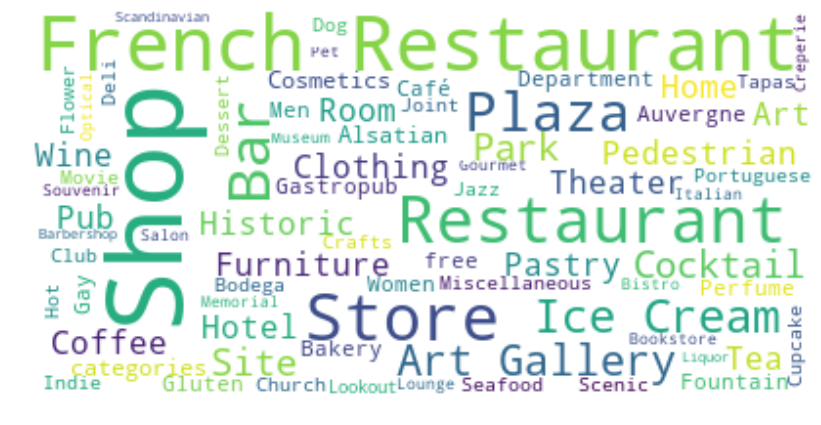

In [51]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(tour_eiffel_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>Map Visualisation</h3>

In [52]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) 


label = folium.Popup('eiffel', parse_html=True)
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup=label,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


for lat, lng, name, category in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name, dataframe_filtered.categories):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        fill=True,
        color= 'green',
        fill_color = 'black',
        fill_opacity=0.6
        ).add_to(venues_map)

venues_map

<h1>10. Tendance of this Venue</h1>

In [53]:
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

results = requests.get(url).json()

In [54]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [56]:
trending_venues_df

'No trending venues are available at the moment!'

<h3>Map visualisation</h3>

In [57]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) 


   
    label = folium.Popup('Arc de Triomphe', parse_html=True)
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=15,
        popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


   
    for lat, lng, name, category in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name'], trending_venues_df['categories']):
        label = '{}, {}'.format(name, category)
        label = folium.Popup(label, parse_html=True)
        folium.features.CircleMarker(
            [lat, lng],
            radius=10,
            poup=label,
            fill=True,
            color='blue',
            fill_color='black',
            fill_opacity=0.6
        ).add_to(venues_map)

In [58]:
venues_map

'Cannot generate visual as no trending venues are available at the moment!'

<h1>Here is the end of the data analysis. It is possible to rework some chart, but I think I already have enough result to make a conclusion.
The example for this capital Paris can also be realized for the other three. It is also interesting that we can compare to each other. Other factors could be added such as weather and cost depending on the time of the year chosen.</h1>